In [2]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Plot AUC of retina and GTEx model

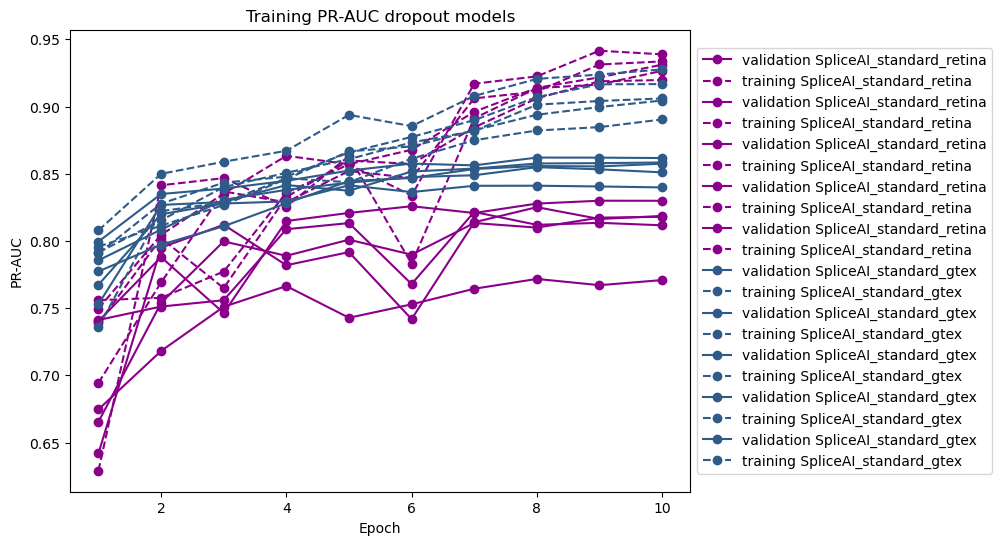

In [3]:
def plot_auc(file, model_num, color, ax=None):
    with open(file) as f:
        text = f.read()

    # Define a regular expression pattern to match the training set metrics
    pattern = re.compile(r'set metrics:(.*?)Learning rate:', re.DOTALL)

    # Find all matches in the text
    matches = re.findall(pattern, text)

    acceptor_val = []
    donor_val = []
    acceptor_train = []
    donor_train = []

    # Extract and print the training set metrics
    for match in matches:
        all =  match.split(':')
        acceptor_val.append(float(all[6].split('\t')[0].strip()))
        donor_val.append(float(all[17].split('\t')[0].strip()))
        acceptor_train.append(float(all[29].split('\t')[0].strip()))
        donor_train.append(float(all[40].split('\t')[0].strip()))

    x = [i for i in range(1, 11)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    validation = [(x + y) / 2 for x, y in zip(acceptor_val, donor_val)]
    training = [(x + y) / 2 for x, y in zip(acceptor_train, donor_train)]

    ax.plot(x, validation, label='validation ' + str(model_num), color=color, marker='o')
    ax.plot(x, training, label='training ' + str(model_num), color=color, marker='o', linestyle='dashed')

    return ax

# Define colors for each file
colors = ['#8B008B', '#2E5B88', '#A6C48A', '#678D58', '#9FCAE6']

# import the data
path = '../output_train/'
fig, ax = plt.subplots(figsize=(10, 6))

for model, color, name in zip(['SpliceAI_standard_retina', 'SpliceAI_standard_gtex'], colors, ['Retina', 'GTEx']):
    for i in range(1,6):
        ax = plot_auc(path + model + str(i) + '.txt', model, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('PR-AUC')
ax.set_title('Training PR-AUC dropout models')
plt.show()

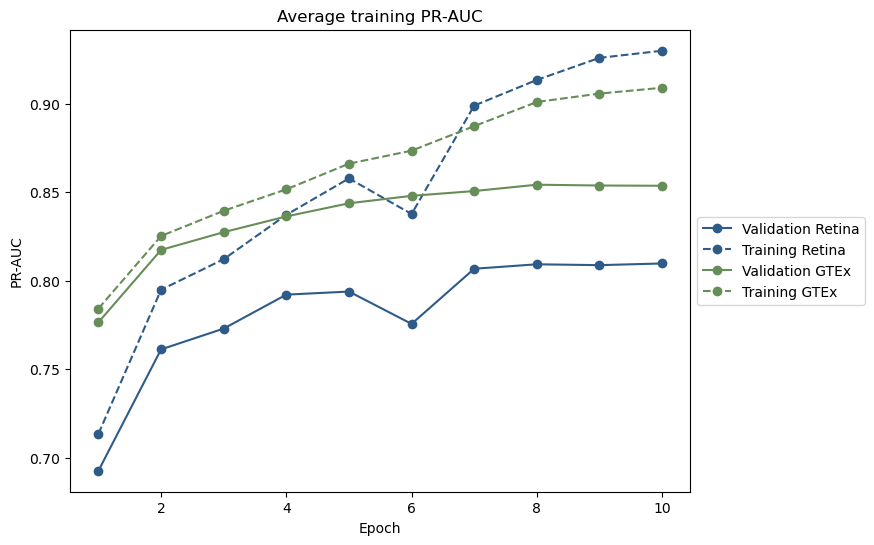

In [4]:
def get_auc(file):
    with open(file) as f:
        text = f.read()

    # Define a regular expression pattern to match the training set metrics
    pattern = re.compile(r'set metrics:(.*?)Learning rate:', re.DOTALL)

    # Find all matches in the text
    matches = re.findall(pattern, text)

    acceptor_val = []
    donor_val = []
    acceptor_train = []
    donor_train = []

    # Extract and print the training set metrics
    for match in matches:
        all =  match.split(':')
        acceptor_val.append(float(all[6].split('\t')[0].strip()))
        donor_val.append(float(all[17].split('\t')[0].strip()))
        acceptor_train.append(float(all[29].split('\t')[0].strip()))
        donor_train.append(float(all[40].split('\t')[0].strip()))

    return [acceptor_val, donor_val, acceptor_train, donor_train]


def plot_metric(acceptor_val, donor_val, acceptor_train, donor_train, model_num, color, ax=None):

    x = [i for i in range(1, 11)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    validation = [(x + y) / 2 for x, y in zip(acceptor_val, donor_val)]
    training = [(x + y) / 2 for x, y in zip(acceptor_train, donor_train)]

    ax.plot(x, validation, label='Validation ' + str(model_num), color=color, marker='o')
    ax.plot(x, training, label='Training ' + str(model_num), color=color, marker='o', linestyle='dashed')

    return ax

def mean_of_lists(*lists):
    # Combine elements at the same positions using zip
    grouped_elements = zip(*lists)
    # Calculate the mean for each group
    means = [sum(group) / len(group) for group in grouped_elements]
    return means

# Define colors for each file
colors = ['#2E5B88', '#678D58'] # ['#8B008B', '#2E5B88', '#A6C48A', '#678D58', '#9FCAE6']

# import the data
path = '../output_train/'
fig, ax = plt.subplots(figsize=(10, 6))

# get the accuracy for each model
models = ['SpliceAI_standard_retina', 'SpliceAI_standard_gtex']

# get the auc for each model
auc = []
for model in models:
    model1 = get_auc(path + model + str(1) + '.txt')
    model2 = get_auc(path + model + str(2) + '.txt')
    model3 = get_auc(path + model + str(3) + '.txt')
    model4 = get_auc(path + model + str(4) + '.txt')
    model5 = get_auc(path + model + str(5) + '.txt')
    
    out = []

    for i in range(len(model1)):
        out.append(mean_of_lists(model1[i], model2[i], model3[i], model4[i], model5[i]))

    auc.append(out)

for i, color, name in zip(auc, colors, ['Retina','GTEx']):
    ax = plot_metric(i[0], i[1], i[2], i[3], name, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('PR-AUC')
ax.set_title('Average training PR-AUC')
plt.savefig('Retina_GTEx_AUC.svg')
plt.show()

# Optimized

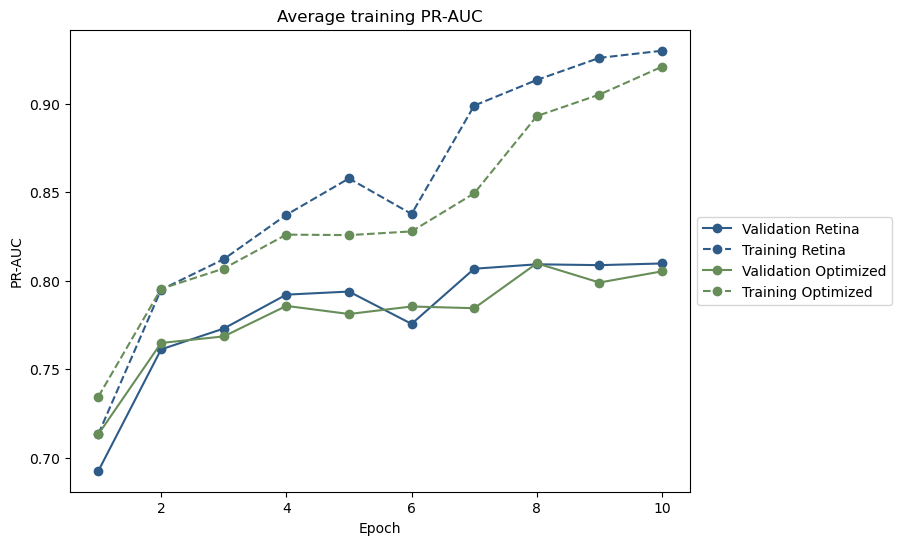

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

# get the accuracy for each model
models = ['SpliceAI_standard_retina', 'SpliceAI_optimized_retina']

# get the auc for each model
auc = []
for model in models:
    model1 = get_auc(path + model + str(1) + '.txt')
    model2 = get_auc(path + model + str(2) + '.txt')
    model3 = get_auc(path + model + str(3) + '.txt')
    model4 = get_auc(path + model + str(4) + '.txt')
    model5 = get_auc(path + model + str(5) + '.txt')
    
    out = []

    for i in range(len(model1)):
        out.append(mean_of_lists(model1[i], model2[i], model3[i], model4[i], model5[i]))

    auc.append(out)

for i, color, name in zip(auc, colors, ['Retina','Optimized']):
    ax = plot_metric(i[0], i[1], i[2], i[3], name, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('PR-AUC')
ax.set_title('Average training PR-AUC')
plt.savefig('Optimized_AUC.svg')
plt.show()